In [1]:
from platform import python_version

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# seed
RANDOM_STATE = 1776

# set seaborn theme
sns.set_theme()

# print versions
print("Numpy Version: " + np.__version__)
print("Pandas Version: " + pd.__version__)
print("Seaborn Version: " + sns.__version__)
print("Matplotlib Version: " + plt.matplotlib.__version__)
print("Python Version: " + python_version())

# adjust pandas display options to max
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# adjust pandas display options to ensure full display of content
pd.set_option('display.max_colwidth', None)

# import user functions
import UserFunctions as uf

Numpy Version: 1.26.4
Pandas Version: 2.2.3
Seaborn Version: 0.13.2
Matplotlib Version: 3.9.2
Python Version: 3.9.20


### Import Data

In [2]:
# full dataframe
df = pd.read_pickle("../Data/CleanFullLabelsML.pkl")

# data dictionary
df_dict = pd.read_pickle("../Data/FinalcolumnDefinitionML.pkl")

# data label
df_label = pd.read_pickle("../Data/colLabelML.pkl") 

# boolean
df_bool = pd.read_pickle("../Data/colBooleanML.pkl")

# nominal
df_nominal = pd.read_pickle("../Data/colNominalML.pkl")

# ordinal
df_ordinal = pd.read_pickle("../Data/colOrdinalML.pkl")

# numeric
df_numeric = pd.read_pickle("../Data/colNumericML.pkl")

# checking for duplicated column name
df.columns[df.columns.duplicated()]

Index([], dtype='object')

#### Data Shape

In [3]:
# df DataFrame
print(f"Orginal Data file Shape: {df.shape}")
print(f"Label(s) Data rows: {len(df_label)}")
print(f"Boolean(s) Data rows: {len(df_bool)}")
print(f"Ordinal(s) Data rows: {len(df_ordinal)}")
print(f"Nominal(s) Data rows: {len(df_nominal)}")
print(f"Numeric(s) Data rows: {len(df_numeric)}")

Orginal Data file Shape: (14856, 121)
Label(s) Data rows: 13
Boolean(s) Data rows: 9
Ordinal(s) Data rows: 15
Nominal(s) Data rows: 79
Numeric(s) Data rows: 18


In [4]:
# display NaNs
DFNaN = uf.percentageNull(df)

# display
DFNaN.head(15)

,percentage,NaNCount


In [5]:
df_label

,label
0,FollowUpFunctionalStatus_CAN
1,AirwayDehiscencePostTransplant_CAN
2,AcuteRejectionEpisode_CAN
3,StrokePostTransplant_CAN
4,PacemakerPostTransplant_CAN
5,GraftFailed_CAN
6,LastFollowupNumber_CAN
7,TransplantStatus_CAN
8,TransplantSurvivalDay_CAN
9,RecipientStatus_CAN


In [6]:
# select label for classification
removeCol = df_label.label.to_list()

# remove GraftFailed_CAN
removeCol.remove('TransplantStatus_CAN')
removeCol.remove('TransplantSurvivalDay_CAN')

# remove unwanted features
df, df_bool, df_ordinal, df_nominal, df_numeric = uf.removeHouseKeeping(df, removeCol, df_bool, df_ordinal, df_nominal, df_numeric)

# features names to list
boolCol = df_bool.boolean.to_list()
nominalCol = df_nominal.nominal.to_list()
ordinalCol = df_ordinal.ordinal.to_list()
numericCol = df_numeric.numeric.to_list()

Remove row(s) from df_boolean DataFrame.
Remove row(s) from df_ordinal DataFrame.
Remove row(s) from df_nominal DataFrame.
Remove row(s) from df_numeric DataFrame.

Removed Features:['FollowUpFunctionalStatus_CAN', 'AirwayDehiscencePostTransplant_CAN', 'AcuteRejectionEpisode_CAN', 'StrokePostTransplant_CAN', 'PacemakerPostTransplant_CAN', 'GraftFailed_CAN', 'LastFollowupNumber_CAN', 'RecipientStatus_CAN', 'RejectionTreatmentWithinOneYear_CAN', 'GraftStatus_CAN', 'LengthOfStay_CAN']

Total rows before: 14,856 & columns: 121
Total rows after: 14,856 & columns: 110


In [7]:
# df DataFrame
print(f"Orginal Data file Shape: {df.shape}")
print(f"Boolean(s) Data rows: {len(boolCol)}")
print(f"Ordinal(s) Data rows: {len(ordinalCol)}")
print(f"Nominal(s) Data rows: {len(nominalCol)}")
print(f"Numeric(s) Data rows: {len(numericCol)}")
print("\nTotal Length of Features:", len(boolCol) + len(ordinalCol) + len(nominalCol) + len(numericCol))

Orginal Data file Shape: (14856, 110)
Boolean(s) Data rows: 9
Ordinal(s) Data rows: 15
Nominal(s) Data rows: 69
Numeric(s) Data rows: 17

Total Length of Features: 110


#### Encode

In [8]:
print(sorted(nominalCol))

['AntibodyResultHBSAB_DON', 'Antibody_HEP_C_DON', 'Antihypertensive_DON', 'ArginnieManagement_DON', 'AtTransplantSurfaceHBVAntibodyTotal_CAN', 'Biopsy_DON', 'Bronchoscopy_DON_Combined', 'CMVStatusAtTransplant_CAN', 'Cancer_DON_Combined', 'CardiacArrest_DON', 'CerebrovascularDisease_CAN', 'ChestXray_DON', 'ChronicSteroidsUse_CAN', 'CigaretteHistory_DON', 'CigaretteUse_CAN', 'ClinicalInfection_DON', 'CocaineUse_DON', 'CoronaryAngiogram_DON', 'CrossMatch', 'DeathMechanism_DON', 'DeceasedRetyped_DON', 'DefibrillatorImplant_CAN', 'Diabetes_CAN', 'DiagnosisType_CAN', 'DialysisAfterList_CAN', 'Diuretics_DON', 'EpsteinBarrStatusTransplant_CAN', 'EpsteinBarr_DON_Combined', 'HeartProcedureType_CAN', 'HeavyAlcoholUse_DON', 'HeparinManagement_DON', 'Hepatitis_B_CoreAntibody_CAN', 'Hepatitis_B_CoreAntibody_DON', 'Hypertension_DON', 'InfectionTherapyIV_CAN', 'InotropicMedication_DON', 'InsulinManagement_DON', 'IntropesVasodilators_CAN_Combined', 'LV_EjectionFractionMedthod_DON', 'LifeSupport_CAN_Com

In [9]:
df[nominalCol].head()

,Transfusion_CAN,Result_RPR_VDRL_DON,SerologyAntiCMV_DON,ArginnieManagement_DON,Diuretics_DON,HeartProcedureType_CAN,InfectionTherapyIV_CAN,EpsteinBarrStatusTransplant_CAN,Thyroxine_T4_DON,AntibodyResultHBSAB_DON,CardiacArrest_DON,Antibody_HEP_C_DON,LV_EjectionFractionMedthod_DON,SurfaceAntigenHEP_B_CAN,AtTransplantSurfaceHBVAntibodyTotal_CAN,Hepatitis_B_CoreAntibody_DON,Hepatitis_B_CoreAntibody_CAN,DiagnosisType_CAN,TransplantSerostatusHIV_CAN,SurfaceAntigenHEP_B_DON,Triiodothyronine_T3_DON,CocaineUse_DON,PanelReactiveAntibody_CPRA_CAN,PastOtherDrugUse_DON,HeavyAlcoholUse_DON,SteroidsUse_DON,CerebrovascularDisease_CAN,Tatoos_DON,PastCocaineUse_DON,Diabetes_CAN,CigaretteUse_CAN,OtherDrugUse_DON,Biopsy_DON,ChronicSteroidsUse_CAN,SerostatusStatus_HEP_C_CAN,HeparinManagement_DON,InsulinManagement_DON,ClinicalInfection_DON,CMVStatusAtTransplant_CAN,NonHeartBeating_DON,UrinePortein_DON,DefibrillatorImplant_CAN,DeathMechanism_DON,TransfusionNumber_DON,SynthicAntiDiureticHormone_DON,Vasodilator_DON,InotropicMedication_DON,PriorCardiacSurgery_CAN,DeceasedRetyped_DON,CoronaryAngiogram_DON,PriorLungSurgery_CAN,PulmCath_DON,OtherInfectionSource_DON,Antihypertensive_DON,RiskHIV_DON,CrossMatch,MyocardialInfarction_DON,Hypertension_DON,PreviousMalignancy_CAN,CigaretteHistory_DON,DialysisAfterList_CAN,ChestXray_DON,Bronchoscopy_DON_Combined,Cancer_DON_Combined,EpsteinBarr_DON_Combined,IntropesVasodilators_CAN_Combined,LifeSupport_CAN_Combined,PreTranspantNAT_CAN_Combined,ResultNAT_DON_Combined
0,Y,Negative,Positive,Y,Y,Orthotopic Bicaval,N,Positive,N,Unknown,N,Negative,Echo,Negative,Negative,Negative,Negative,DILATED MYOPATHY,Negative,Negative,N,U,Low Sensitization,Y,N,Y,N,Y,N,Yes,Y,Y,Needle,N,Negative,Y,N,Y,Positive,N,N,Y,GUNSHOT WOUND,NONE,N,N,N,N,N,Unknown,N,N,0,N,N,Y,N,N,N,N,N,Abnormal,Abnormal,No,Positive,No,Yes,Unknown,Negative
1,N,Negative,Positive,N,Y,Orthotopic Traditional,Y,Positive,N,Unknown,N,Negative,Echo,Negative,Negative,Negative,Negative,DILATED MYOPATHY,Negative,Negative,N,N,Some Sensitization,N,N,Y,N,Y,Y,No,N,U,Needle,N,Negative,N,Y,Y,Positive,N,N,Y,CARDIOVASCULAR,NONE,N,Y,N,N,N,Normal,N,N,0,Y,N,Y,N,N,N,N,N,Normal,Normal,No,Positive,No,Yes,Unknown,Negative
2,N,Negative,Positive,Y,Y,Orthotopic Bicaval,N,Positive,N,Unknown,N,Negative,Echo,Negative,Negative,Negative,Negative,DILATED MYOPATHY,Negative,Negative,N,U,Some Sensitization,N,N,Y,N,N,N,No,N,U,Needle,N,Negative,Y,Y,Y,Positive,N,N,Y,DRUG INTOXICATION,1 - 5,N,Y,N,Y,Y,Normal,N,N,0,Y,N,Y,N,N,N,N,N,Abnormal,Normal,No,Unknown,No,Yes,Unknown,Negative
3,N,Negative,Positive,N,Y,Orthotopic Bicaval,N,Positive,Y,Negative,N,Negative,Echo,Negative,Negative,Negative,Negative,DILATED MYOPATHY,Negative,Negative,N,U,Unknown,N,N,Y,N,N,N,No,Y,U,Needle,N,Negative,Y,Y,Y,Positive,N,Y,Y,INTRACRANIAL HEMORRHAGE/STROKE,6 - 10,N,N,Y,N,Y,Normal,N,N,0,N,N,Y,N,Y,N,N,N,Abnormal,Unknown,No,Positive,Yes,Yes,Unknown,Negative
4,N,Negative,Positive,Y,Y,Orthotopic Bicaval,N,Positive,Y,Unknown,N,Negative,Echo,Negative,Negative,Negative,Negative,DILATED MYOPATHY,Negative,Negative,N,U,No Sensitization,N,N,Y,N,N,N,No,Y,U,Needle,N,Negative,Y,N,Y,Negative,N,N,N,INTRACRANIAL HEMORRHAGE/STROKE,NONE,N,Y,N,Y,N,Unknown,N,N,0,Y,N,Y,N,N,N,N,N,Abnormal,Unknown,No,Positive,No,Yes,Unknown,Negative


In [10]:
# display label
df.TransplantStatus_CAN.value_counts(dropna=False)

TransplantStatus_CAN
False    13005
True      1851
Name: count, dtype: int64

In [11]:
df[['TransplantSurvivalDay_CAN','TransplantStatus_CAN']].describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TransplantSurvivalDay_CAN,14856.0,NaN,NaN,NaN,634.23371,473.942355,0.0,194.0,606.0,1084.0,1799.0
TransplantStatus_CAN,14856,2,False,13005,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Determine Candidate Survival for 600 Days

In [12]:
# create new feature
df['Survival'] = df.TransplantSurvivalDay_CAN >= 600

# drop features
df = df.drop(columns=['TransplantSurvivalDay_CAN','TransplantStatus_CAN'])

# shape
df.shape

(14856, 109)

#### Split Train & Validation & Test

In [13]:
# split dataset
X, y, X_train, X_test, X_val, y_train, y_val, y_test = uf.EncodeDummyTrainValTest(df, 'Survival', nominalCol, RANDOM_STATE)

Training Dependent Shape: (9507, 204) & Label Shape: (9507,)
Validation Dependent Shape: (2377, 204) & Label Shape: (2377,)
Testing Dependent Shape: (2972, 204) & Label Shape: (2972,)


#### Identify Columns with LOW Variance

In [14]:
# identify and drop low variance columns
low_variance_cols = [col for col in X_train.columns if X_train[col].var() < 0.01]
print("Low Variance Columns:", low_variance_cols)

Low Variance Columns: ['ResultHIV_NAT_DON', 'BloodPH_DON', 'Transfusion_CAN_U', 'Result_RPR_VDRL_DON_Positive', 'Result_RPR_VDRL_DON_Unknown', 'SerologyAntiCMV_DON_Unknown', 'ArginnieManagement_DON_U', 'Diuretics_DON_U', 'HeartProcedureType_CAN_Unknown', 'InfectionTherapyIV_CAN_U', 'Thyroxine_T4_DON_U', 'Antibody_HEP_C_DON_Unknown', 'LV_EjectionFractionMedthod_DON_Unknown', 'Hepatitis_B_CoreAntibody_DON_Unknown', 'DiagnosisType_CAN_CANCER', 'DiagnosisType_CAN_MUSCULAR DYSTROPHY', 'DiagnosisType_CAN_VALVULAR HEART DISEASE', 'TransplantSerostatusHIV_CAN_Positive', 'SurfaceAntigenHEP_B_DON_Positive', 'SurfaceAntigenHEP_B_DON_Unknown', 'Triiodothyronine_T3_DON_U', 'Triiodothyronine_T3_DON_Y', 'SteroidsUse_DON_U', 'CerebrovascularDisease_CAN_U', 'Tatoos_DON_U', 'Diabetes_CAN_Unknown', 'CigaretteUse_CAN_U', 'Biopsy_DON_Needle', 'Biopsy_DON_Unknown', 'Biopsy_DON_Wedge', 'HeparinManagement_DON_U', 'InsulinManagement_DON_U', 'ClinicalInfection_DON_U', 'NonHeartBeating_DON_U', 'UrinePortein_DON_

In [15]:
# remove columns with Low Variance
X_train = X_train.drop(columns=low_variance_cols)
X_val = X_val.drop(columns=low_variance_cols)
X_test = X_test.drop(columns=low_variance_cols)

# display
X_train.shape, X_val.shape, X_test.shape

((9507, 150), (2377, 150), (2972, 150))

#### SelectKBest & f_classif

In [16]:
# get SelectKBest info
selectedDF = uf.selectKClassif(X_train, y_train, K='all', function='f_classif')

# display
selectedDF.head()

,Feature,Score,p_value
17,DistanceFrom_HospitaltoTXCenter,344.777909,1.253009e-75
16,IschemicTimeHours_DON,190.727940,5.725249e-43
51,CardiacArrest_DON_U,188.687385,1.564915e-42
101,NonHeartBeating_DON_Y,180.383362,9.393529e-41
3,TotalDayWaitList_CAN,164.718576,2.152274e-37


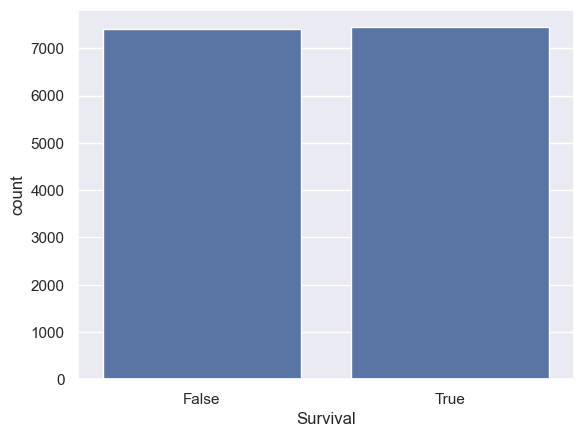

In [17]:
# label count plot
sns.countplot(x=y);

In [18]:
# select p_value <= 0.05
selected = selectedDF.Feature[selectedDF.p_value <= 0.05].to_list()

# display
print(f"Total Features: {len(selected)}\n")
print(selected)

Total Features: 72

['DistanceFrom_HospitaltoTXCenter', 'IschemicTimeHours_DON', 'CardiacArrest_DON_U', 'NonHeartBeating_DON_Y', 'TotalDayWaitList_CAN', 'PreTransplantMedicalCondition_CAN', 'CrossMatch_U', 'DeceasedRetyped_DON_U', 'PreTranspantNAT_CAN_Combined_Unknown', 'Thyroxine_T4_DON_Y', 'Total_AntigenHLA', 'Total_AntigensDR_CAN', 'BloodUreaNitrogenLevel_DON', 'DeceasedRetyped_DON_Y', 'AntigenC1_C2_CAN_Addition', 'AntigenDQ1_DQ2_CAN_Addition', 'CrossMatch_Y', 'DeathMechanism_DON_DRUG INTOXICATION', 'AntibodyResultHBSAB_DON_Unknown', 'AtTransplantSurfaceHBVAntibodyTotal_CAN_Unknown', 'AtTransplantSurfaceHBVAntibodyTotal_CAN_Positive', 'Bronchoscopy_DON_Combined_Unknown', 'PanelReactiveAntibody_CPRA_CAN_Unknown', 'ChronicSteroidsUse_CAN_U', 'UrinePortein_DON_Y', 'OtherDrugUse_DON_Y', 'Diuretics_DON_Y', 'InsulinManagement_DON_Y', 'PulmCath_DON_Y', 'OtherDrugUse_DON_U', 'Antibody_HEP_C_DON_Positive', 'Transfusion_CAN_Y', 'PastOtherDrugUse_DON_U', 'PastOtherDrugUse_DON_Y', 'InotropicMed

### Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn import metrics
# from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
# function from sklearn.utils.class_weight computes the weights for each class to handle imbalanced datasets
from sklearn.utils.class_weight import compute_class_weight

In [20]:
# the 'balanced' mode adjusts weights inversely proportional to class frequencies in the input data for Random Forest
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

# grid search Hyperparameters Random Forest Classfiier
parameters = {
    'n_estimators': [100, 300, 500],
    'min_samples_split': [30, 40, 50],
    'min_samples_leaf': [8, 10, 15],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [5, 7]
}


# Initialize Model with class weights
rfc_param = {'class_weight': class_weight_dict, 'random_state': RANDOM_STATE}

# instantiate Random Forest Classifier
model = RandomForestClassifier(**rfc_param)

# CV with grid search for Hyper-Parameter tuning
rfc_5A_fit = uf.stratified_grid(model, parameters, X_train[selected], y_train, nJobs=-1, nSplit=5, score = 'f1')

# best model
model = rfc_5A_fit.best_estimator_

CV accuracy: 0.690 +/- 0.008


In [21]:
print(model)

RandomForestClassifier(class_weight={False: 1.002425137072965,
                                     True: 0.9975865687303253},
                       max_depth=7, max_features='log2', min_samples_leaf=10,
                       min_samples_split=30, n_estimators=500,
                       random_state=1776)


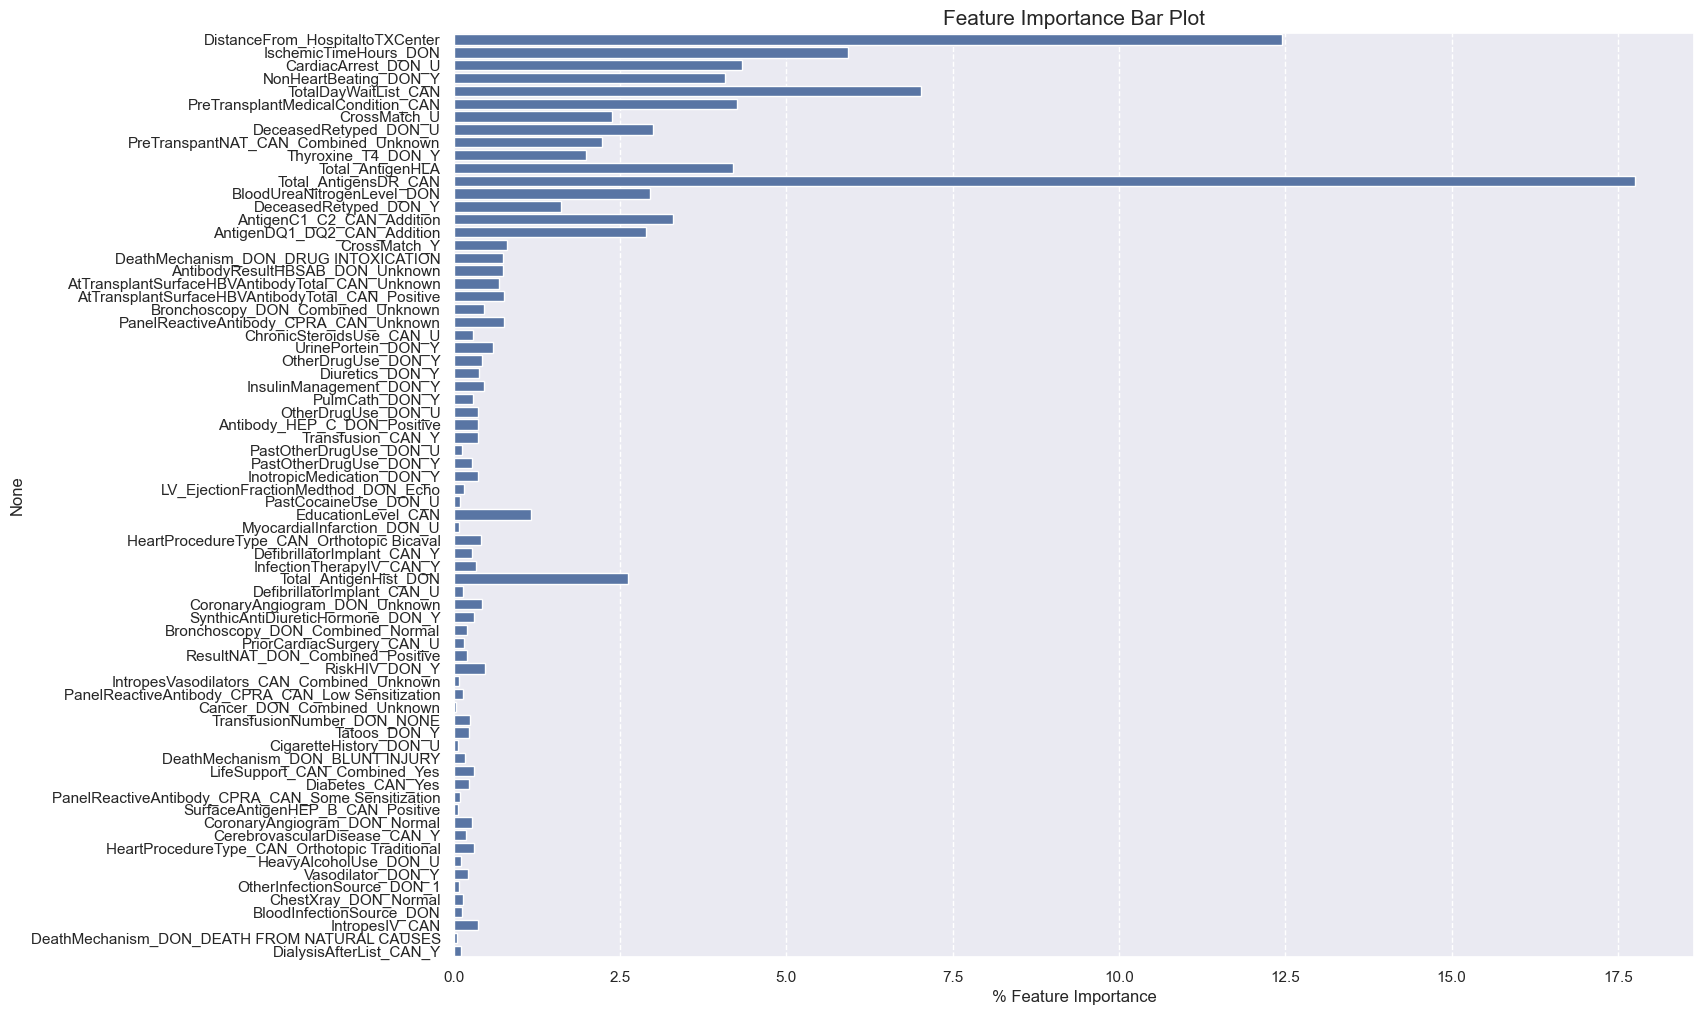

In [22]:
# plot
df_rfc = uf.plotFeatureImportance(model, X_train[selected],figsize=(16,12))

In [23]:
df_rfc.head(10)

,% Feature Importance
DistanceFrom_HospitaltoTXCenter,12.446062
IschemicTimeHours_DON,5.925562
CardiacArrest_DON_U,4.336210
NonHeartBeating_DON_Y,4.071594
TotalDayWaitList_CAN,7.023816
PreTransplantMedicalCondition_CAN,4.251607
CrossMatch_U,2.375247
DeceasedRetyped_DON_U,2.993879
PreTranspantNAT_CAN_Combined_Unknown,2.225581
Thyroxine_T4_DON_Y,1.982583


In [24]:
df_rfc.tail(10)

,% Feature Importance
CerebrovascularDisease_CAN_Y,0.187608
HeartProcedureType_CAN_Orthotopic Traditional,0.305953
HeavyAlcoholUse_DON_U,0.103504
Vasodilator_DON_Y,0.207447
OtherInfectionSource_DON_1,0.080882
ChestXray_DON_Normal,0.144358
BloodInfectionSource_DON,0.114820
IntropesIV_CAN,0.360855
DeathMechanism_DON_DEATH FROM NATURAL CAUSES,0.046374
DialysisAfterList_CAN_Y,0.113682


***** Classification Metrics for Training:
Classification Report:
               precision    recall  f1-score   support

       False       0.72      0.65      0.68      4742
        True       0.68      0.75      0.72      4765

    accuracy                           0.70      9507
   macro avg       0.70      0.70      0.70      9507
weighted avg       0.70      0.70      0.70      9507



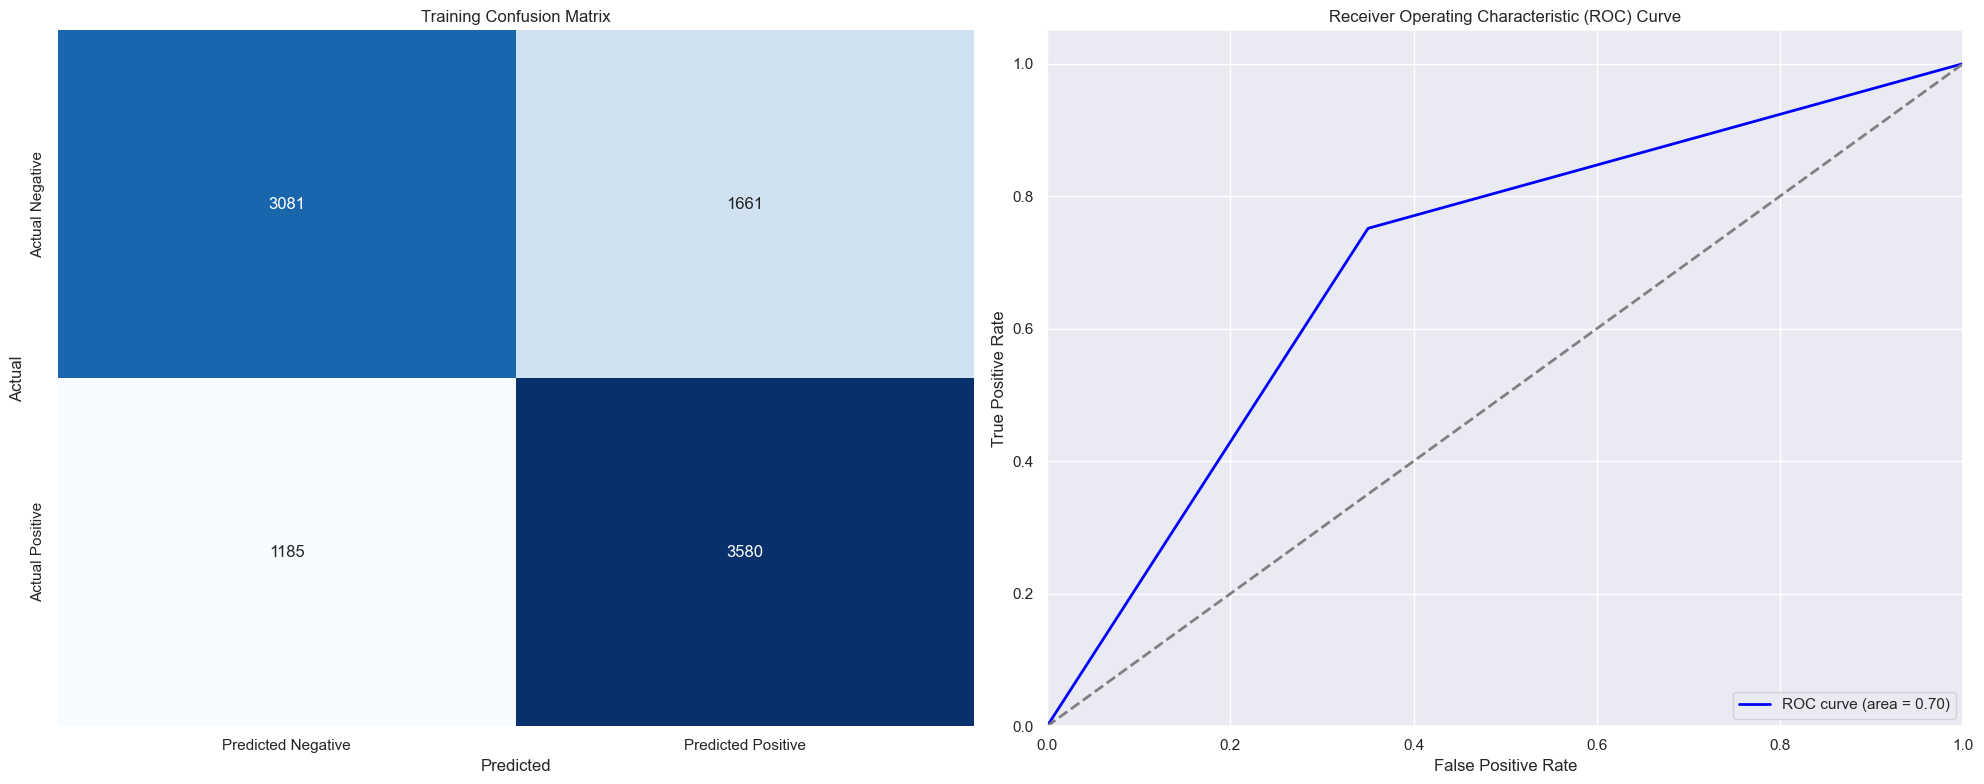

,Algorithm,Model,Description,DataType,Accuracy,RecallSensitivity,F1Score,AveragePrecision,Precision,Specificity,ROC_AUC_Score
0,RandomForestClassifier,rfc_5A_fit,RandomForestClassifier - Grid Search - Features where p_value <= 0.05,Training,0.700642,0.751312,0.715571,0.637848,0.683076,0.649726,0.700519


In [25]:
# initialize variables
Algorithm = 'RandomForestClassifier'
Desc = 'RandomForestClassifier - Grid Search - Features where p_value <= 0.05'
Model = 'rfc_5A_fit'
Type = 'Training'

# display
df_classfication = uf.ClassificationMatric(Algorithm, Model, Desc, model, X_train[selected], y_train, Type, metricDF=None)
df_classfication

***** Classification Metrics for Validation/Test:
Classification Report:
               precision    recall  f1-score   support

       False       0.69      0.61      0.65      1186
        True       0.65      0.72      0.69      1191

    accuracy                           0.67      2377
   macro avg       0.67      0.67      0.67      2377
weighted avg       0.67      0.67      0.67      2377



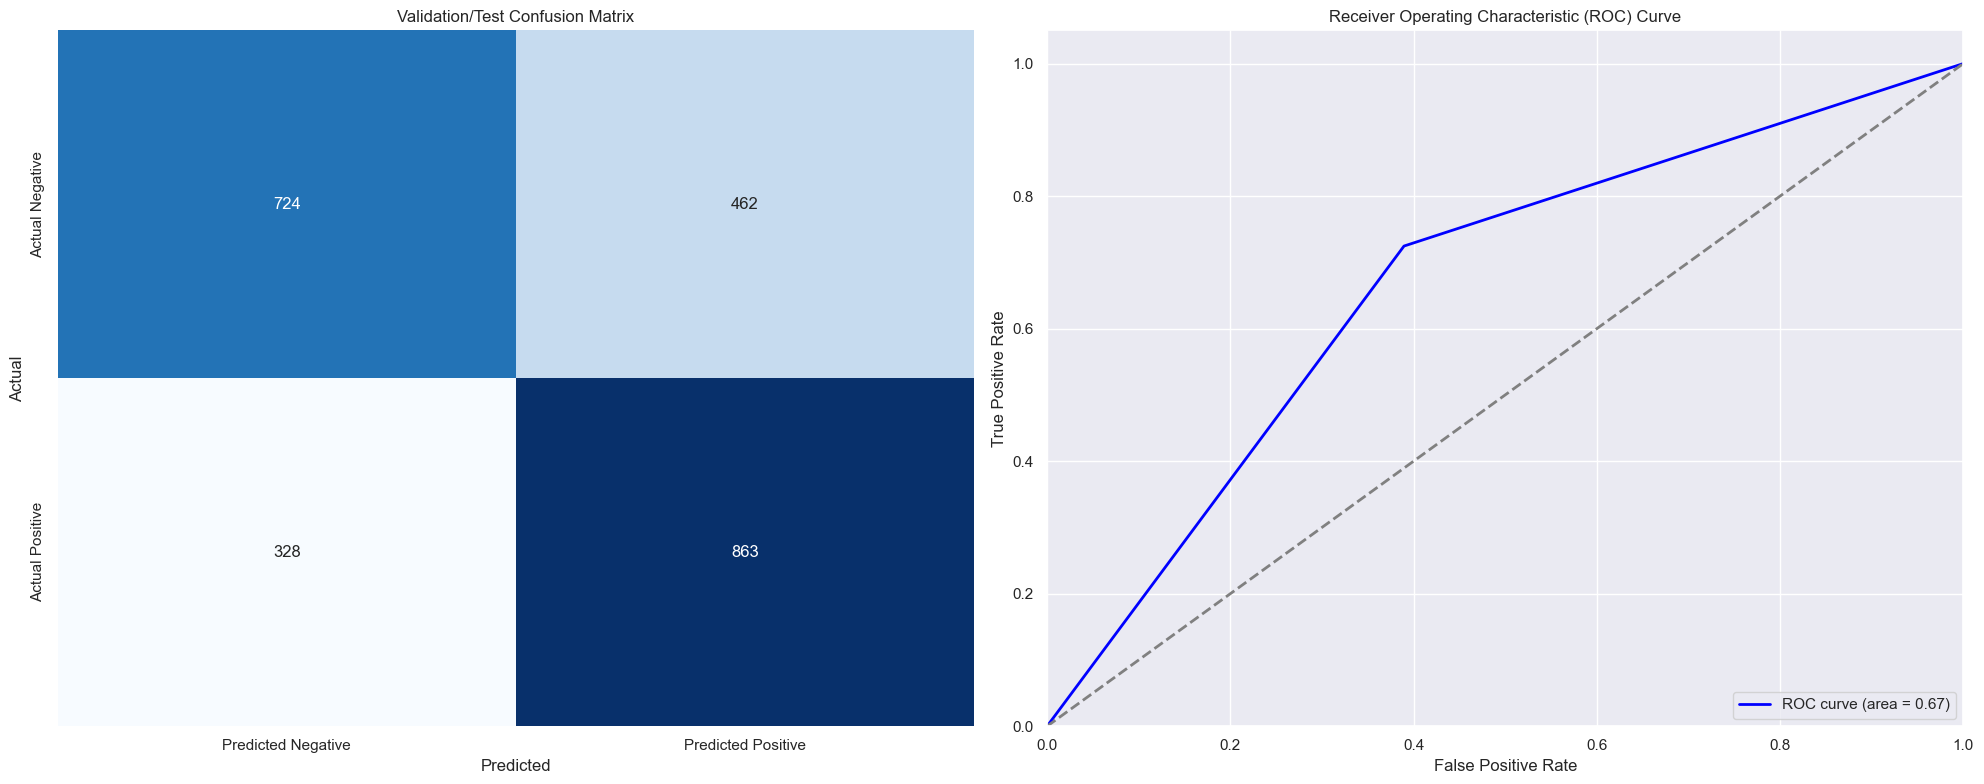

,Algorithm,Model,Description,DataType,Accuracy,RecallSensitivity,F1Score,AveragePrecision,Precision,Specificity,ROC_AUC_Score
0,RandomForestClassifier,rfc_5A_fit,RandomForestClassifier - Grid Search - Features where p_value <= 0.05,Training,0.700642,0.751312,0.715571,0.637848,0.683076,0.649726,0.700519
1,RandomForestClassifier,rfc_5A_fit,RandomForestClassifier - Grid Search - Features where p_value <= 0.05,Validation,0.667648,0.724601,0.686010,0.609937,0.651321,0.610455,0.667528


In [26]:
# initialize variable
Type = 'Validation'

# display
df_classfication = uf.ClassificationMatric(Algorithm, Model, Desc, model, X_val[selected], y_val, Type, df_classfication)
df_classfication

### Logistic Regression

In [27]:
# import library
from sklearn.linear_model import LogisticRegression

# define the hyperparameter grid to search
parameters = dict(
C = list(np.round(np.linspace(0.01, 5, 20),2))
)

# Base Model
lrc_param = {'max_iter':10000, 'class_weight': class_weight_dict, 'random_state': RANDOM_STATE}

# instantiate LogisticRegression Classifier
model = LogisticRegression(**lrc_param)

# CV with grid search for Hyper-Parameter tuning
lrc_5A_fit = uf.stratified_grid(model, parameters, X_train[selected], y_train, nJobs=2, nSplit=5, score='f1')

# best model
model = lrc_5A_fit.best_estimator_

CV accuracy: 0.668 +/- 0.015


In [28]:
print(model)

LogisticRegression(C=4.21,
                   class_weight={False: 1.002425137072965,
                                 True: 0.9975865687303253},
                   max_iter=10000, random_state=1776)


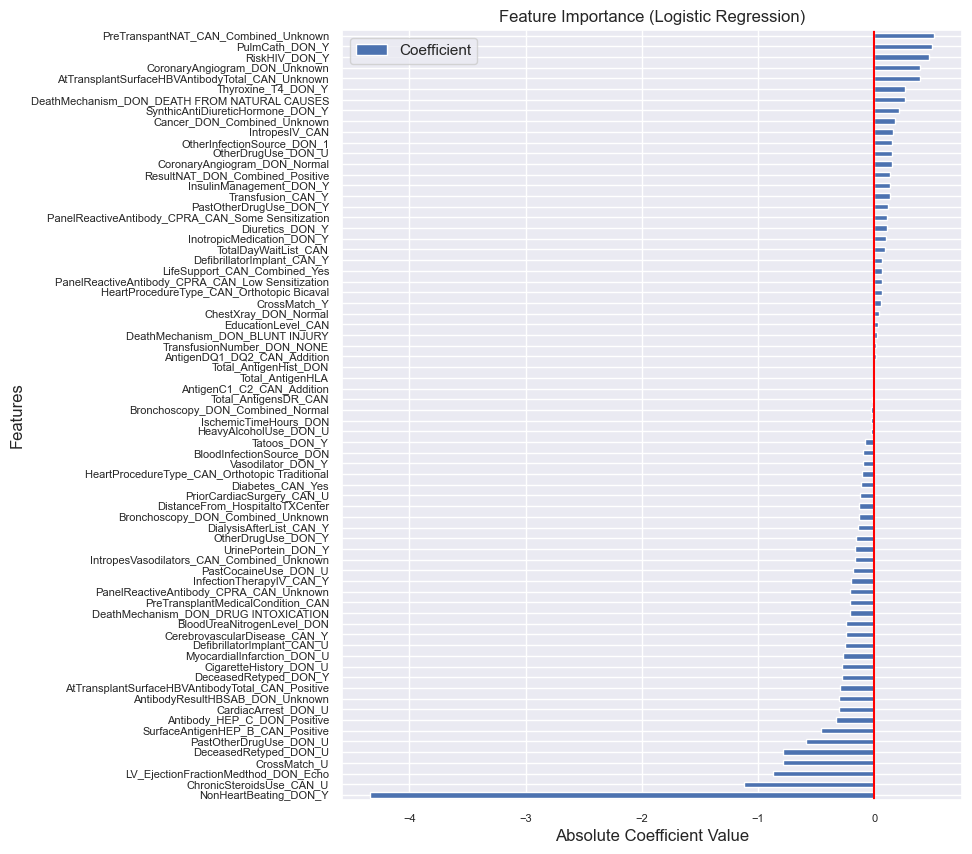

In [29]:
# feature importance & plot
lrc_df = uf.LogisticFeatureImportance(model, figsize=(8,10), fontsize=8)

In [30]:
lrc_df.head(10)

,Feature,Coefficient,Description,Odd Ratio,Percentage Change in Odds,Probability
0,NonHeartBeating_DON_Y,-4.333747,Decrease in the log-odds of the Positive Class,0.013118,-98.688170,0.012948
1,ChronicSteroidsUse_CAN_U,-1.123691,Decrease in the log-odds of the Positive Class,0.325078,-67.492222,0.245327
2,LV_EjectionFractionMedthod_DON_Echo,-0.869797,Decrease in the log-odds of the Positive Class,0.419036,-58.096358,0.295296
3,CrossMatch_U,-0.782219,Decrease in the log-odds of the Positive Class,0.457390,-54.261027,0.313842
4,DeceasedRetyped_DON_U,-0.782219,Decrease in the log-odds of the Positive Class,0.457390,-54.261027,0.313842
5,PastOtherDrugUse_DON_U,-0.584717,Decrease in the log-odds of the Positive Class,0.557264,-44.273645,0.357848
6,SurfaceAntigenHEP_B_CAN_Positive,-0.460770,Decrease in the log-odds of the Positive Class,0.630798,-36.920209,0.386803
7,Antibody_HEP_C_DON_Positive,-0.328152,Decrease in the log-odds of the Positive Class,0.720253,-27.974653,0.418690
8,CardiacArrest_DON_U,-0.304100,Decrease in the log-odds of the Positive Class,0.737787,-26.221283,0.424556
9,AntibodyResultHBSAB_DON_Unknown,-0.299347,Decrease in the log-odds of the Positive Class,0.741302,-25.869761,0.425717


In [31]:
lrc_df.tail(10)

,Feature,Coefficient,Description,Odd Ratio,Percentage Change in Odds,Probability
62,IntropesIV_CAN,0.157426,Increase in the log-odds of the Positive Class,1.170494,17.049381,0.539275
63,Cancer_DON_Combined_Unknown,0.176897,Increase in the log-odds of the Positive Class,1.193508,19.350763,0.544109
64,SynthicAntiDiureticHormone_DON_Y,0.209312,Increase in the log-odds of the Positive Class,1.232829,23.282905,0.552138
65,DeathMechanism_DON_DEATH FROM NATURAL CAUSES,0.262256,Increase in the log-odds of the Positive Class,1.299860,29.985959,0.565191
66,Thyroxine_T4_DON_Y,0.263912,Increase in the log-odds of the Positive Class,1.302014,30.201390,0.565598
67,AtTransplantSurfaceHBVAntibodyTotal_CAN_Unknown,0.392253,Increase in the log-odds of the Positive Class,1.480313,48.031255,0.596825
68,CoronaryAngiogram_DON_Unknown,0.396537,Increase in the log-odds of the Positive Class,1.486667,48.666676,0.597855
69,RiskHIV_DON_Y,0.466997,Increase in the log-odds of the Positive Class,1.595197,59.519722,0.614673
70,PulmCath_DON_Y,0.494086,Increase in the log-odds of the Positive Class,1.638999,63.899875,0.621068
71,PreTranspantNAT_CAN_Combined_Unknown,0.514077,Increase in the log-odds of the Positive Class,1.672095,67.209452,0.625762


***** Classification Metrics for Training:
Classification Report:
               precision    recall  f1-score   support

       False       0.68      0.64      0.66      4742
        True       0.66      0.69      0.68      4765

    accuracy                           0.67      9507
   macro avg       0.67      0.67      0.67      9507
weighted avg       0.67      0.67      0.67      9507



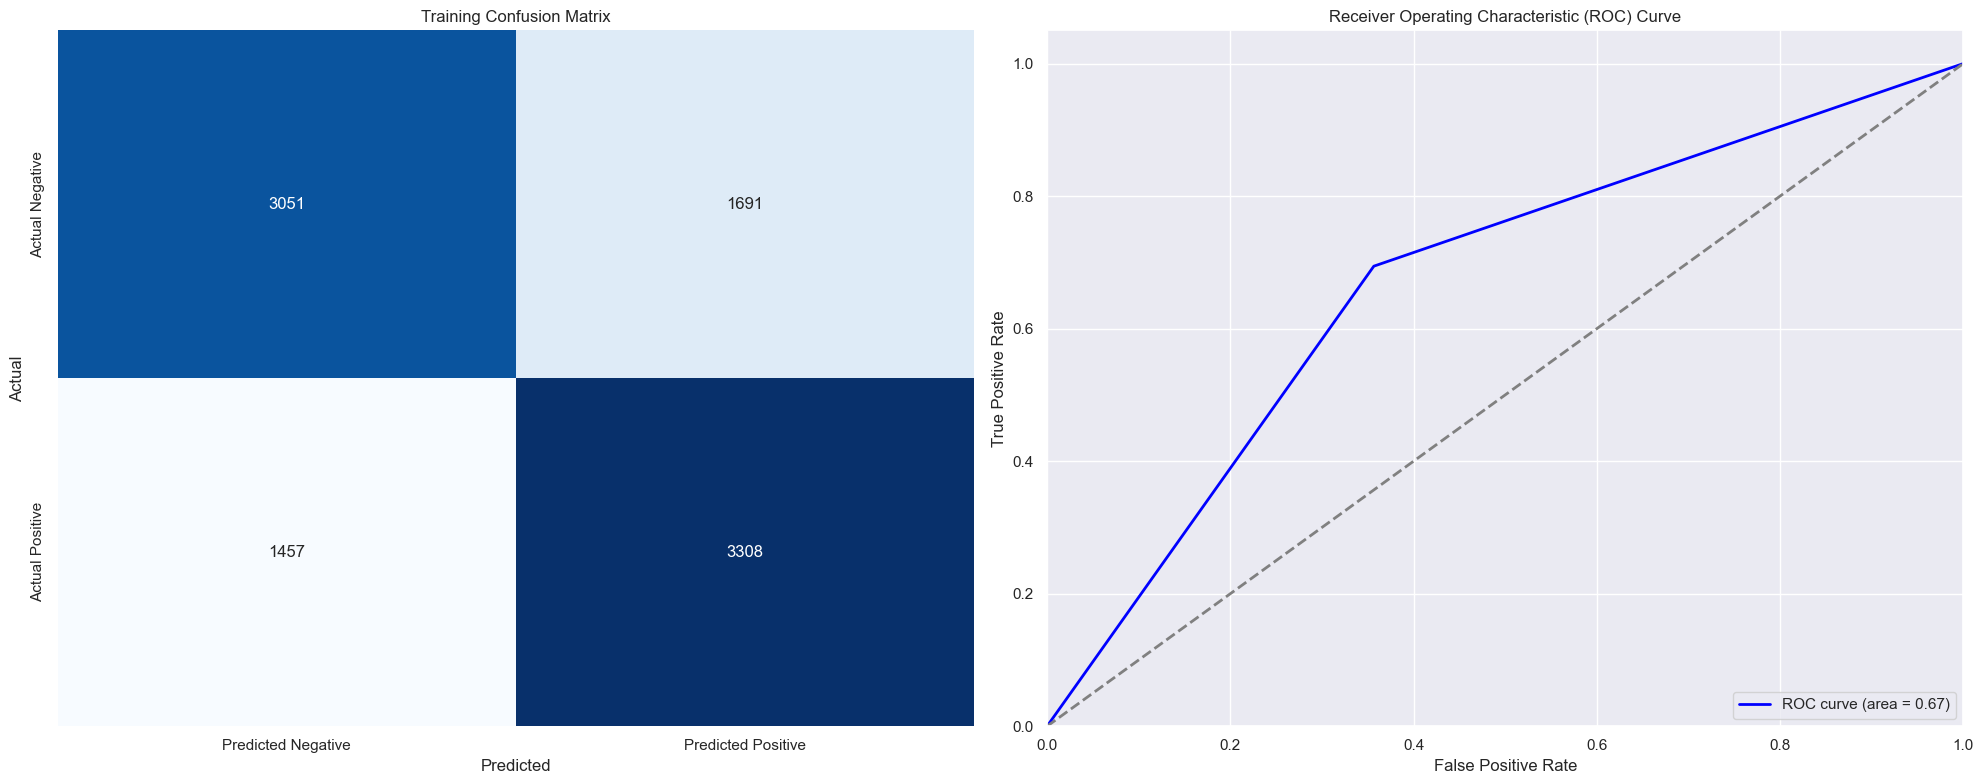

,Algorithm,Model,Description,DataType,Accuracy,RecallSensitivity,F1Score,AveragePrecision,Precision,Specificity,ROC_AUC_Score
0,RandomForestClassifier,rfc_5A_fit,RandomForestClassifier - Grid Search - Features where p_value <= 0.05,Training,0.700642,0.751312,0.715571,0.637848,0.683076,0.649726,0.700519
1,RandomForestClassifier,rfc_5A_fit,RandomForestClassifier - Grid Search - Features where p_value <= 0.05,Validation,0.667648,0.724601,0.686010,0.609937,0.651321,0.610455,0.667528
2,LogisticRegression,lrc_5A_fit,LogisticRegression - Grid Search - Features where p_value <= 0.05,Training,0.668876,0.694229,0.677591,0.612649,0.661732,0.643399,0.668814


In [32]:
# initialize variables
Algorithm = 'LogisticRegression'
Desc = 'LogisticRegression - Grid Search - Features where p_value <= 0.05'
Model = 'lrc_5A_fit'
Type = 'Training'

# display
df_classfication = uf.ClassificationMatric(Algorithm, Model, Desc, model, X_train[selected], y_train, Type, metricDF=df_classfication)
df_classfication

***** Classification Metrics for Validation/Test:
Classification Report:
               precision    recall  f1-score   support

       False       0.67      0.65      0.66      1186
        True       0.66      0.69      0.67      1191

    accuracy                           0.67      2377
   macro avg       0.67      0.67      0.67      2377
weighted avg       0.67      0.67      0.67      2377



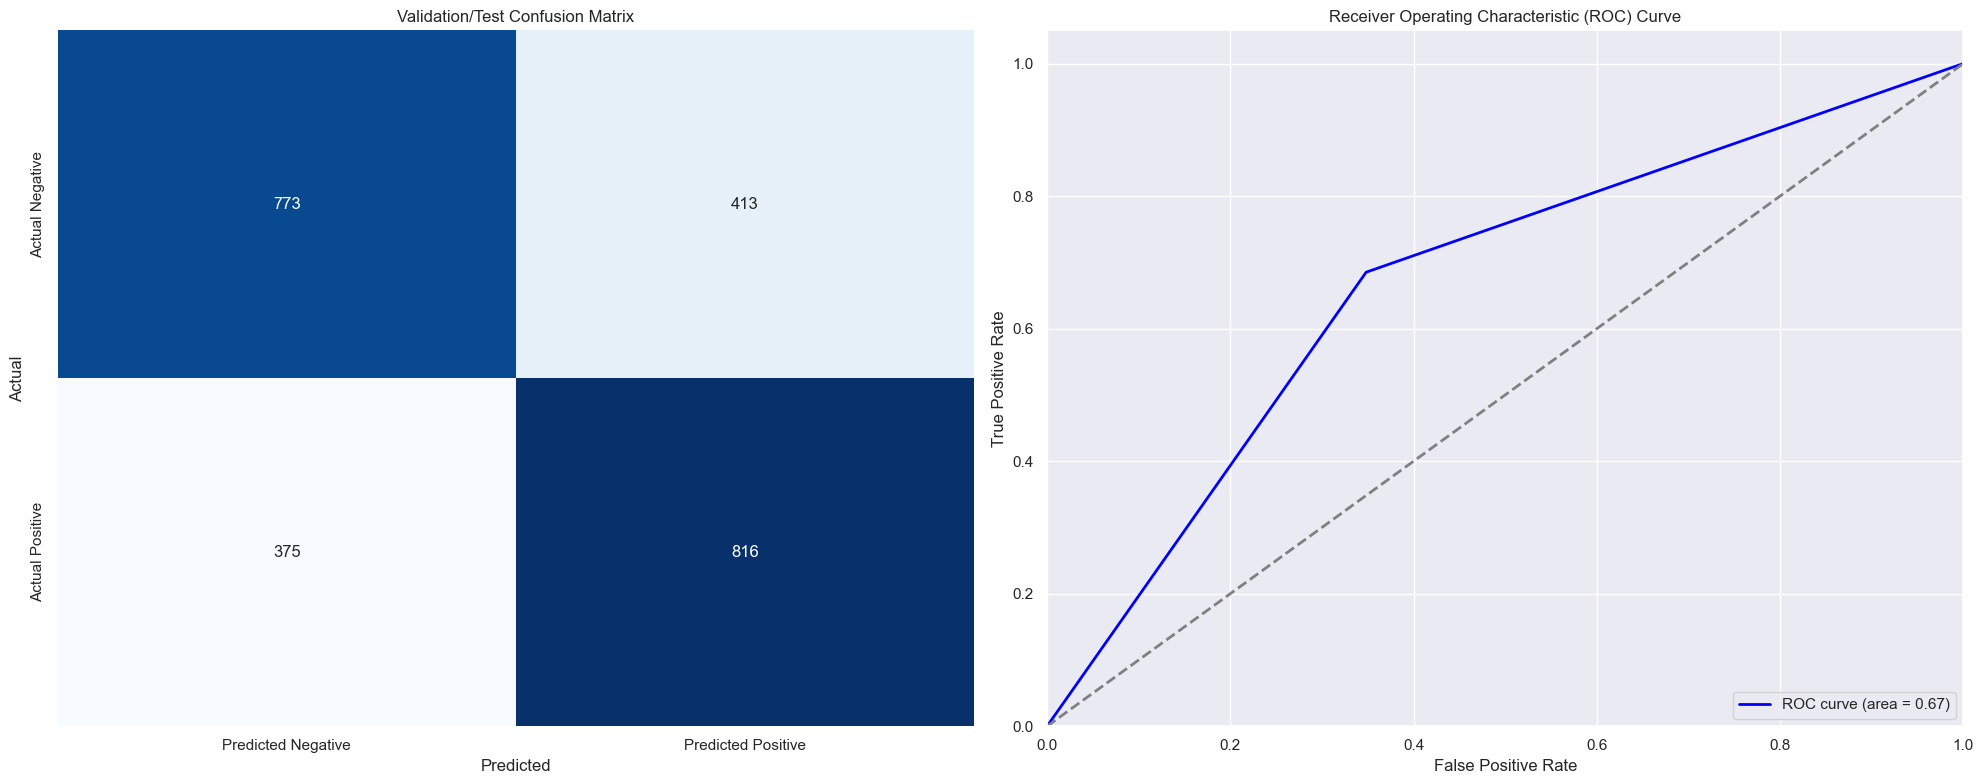

,Algorithm,Model,Description,DataType,Accuracy,RecallSensitivity,F1Score,AveragePrecision,Precision,Specificity,ROC_AUC_Score
0,RandomForestClassifier,rfc_5A_fit,RandomForestClassifier - Grid Search - Features where p_value <= 0.05,Training,0.700642,0.751312,0.715571,0.637848,0.683076,0.649726,0.700519
1,RandomForestClassifier,rfc_5A_fit,RandomForestClassifier - Grid Search - Features where p_value <= 0.05,Validation,0.667648,0.724601,0.686010,0.609937,0.651321,0.610455,0.667528
2,LogisticRegression,lrc_5A_fit,LogisticRegression - Grid Search - Features where p_value <= 0.05,Training,0.668876,0.694229,0.677591,0.612649,0.661732,0.643399,0.668814
3,LogisticRegression,lrc_5A_fit,LogisticRegression - Grid Search - Features where p_value <= 0.05,Validation,0.668490,0.685139,0.674380,0.612663,0.663954,0.651771,0.668455


In [33]:
# initialize variable
Type = 'Validation'

# display
df_classfication = uf.ClassificationMatric(Algorithm, Model, Desc, model, X_val[selected], y_val, Type, metricDF=df_classfication)
df_classfication

#### XGBoost

In [34]:
# import library
from xgboost import XGBClassifier

# calculate the scale_pos_weight to adjust for class imbalance
# helps to counteract the imbalance by giving more weight to the minority class (usually the positive class in binary classification).
scale_pos_weight = np.sum(y_train == 0) / np.sum(y_train == 1)

# define the hyperparameter grid to search
parameters = dict(
n_estimators = [100, 200, 400],
max_depth = [3,7,10],
learning_rate = [0.05, 0.1, 0.3],
subsample = [0.6, 0.8, 1.0],
# colsample_bytree = colsample_bytree,
# min_child_weight = min_child_weight,
gamma = [0.2, 0.4] # regularization term that controls the minimum loss reduction required to make a split at a node.
)

# Base Model
xgb_param = {'scale_pos_weight': scale_pos_weight, 'n_jobs': 1,'random_state': RANDOM_STATE}

# instantiate XGB Classifier
model = XGBClassifier(**xgb_param)

# CV with grid search for Hyper-Parameter tuning
xgb_5A_fit = uf.stratified_grid(model, parameters, X_train[selected], y_train, nJobs=1, nSplit=5, score='f1')

# best model
model = xgb_5A_fit.best_estimator_

CV accuracy: 0.701 +/- 0.011


In [35]:
print(model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=1,
              num_parallel_tree=None, random_state=1776, ...)


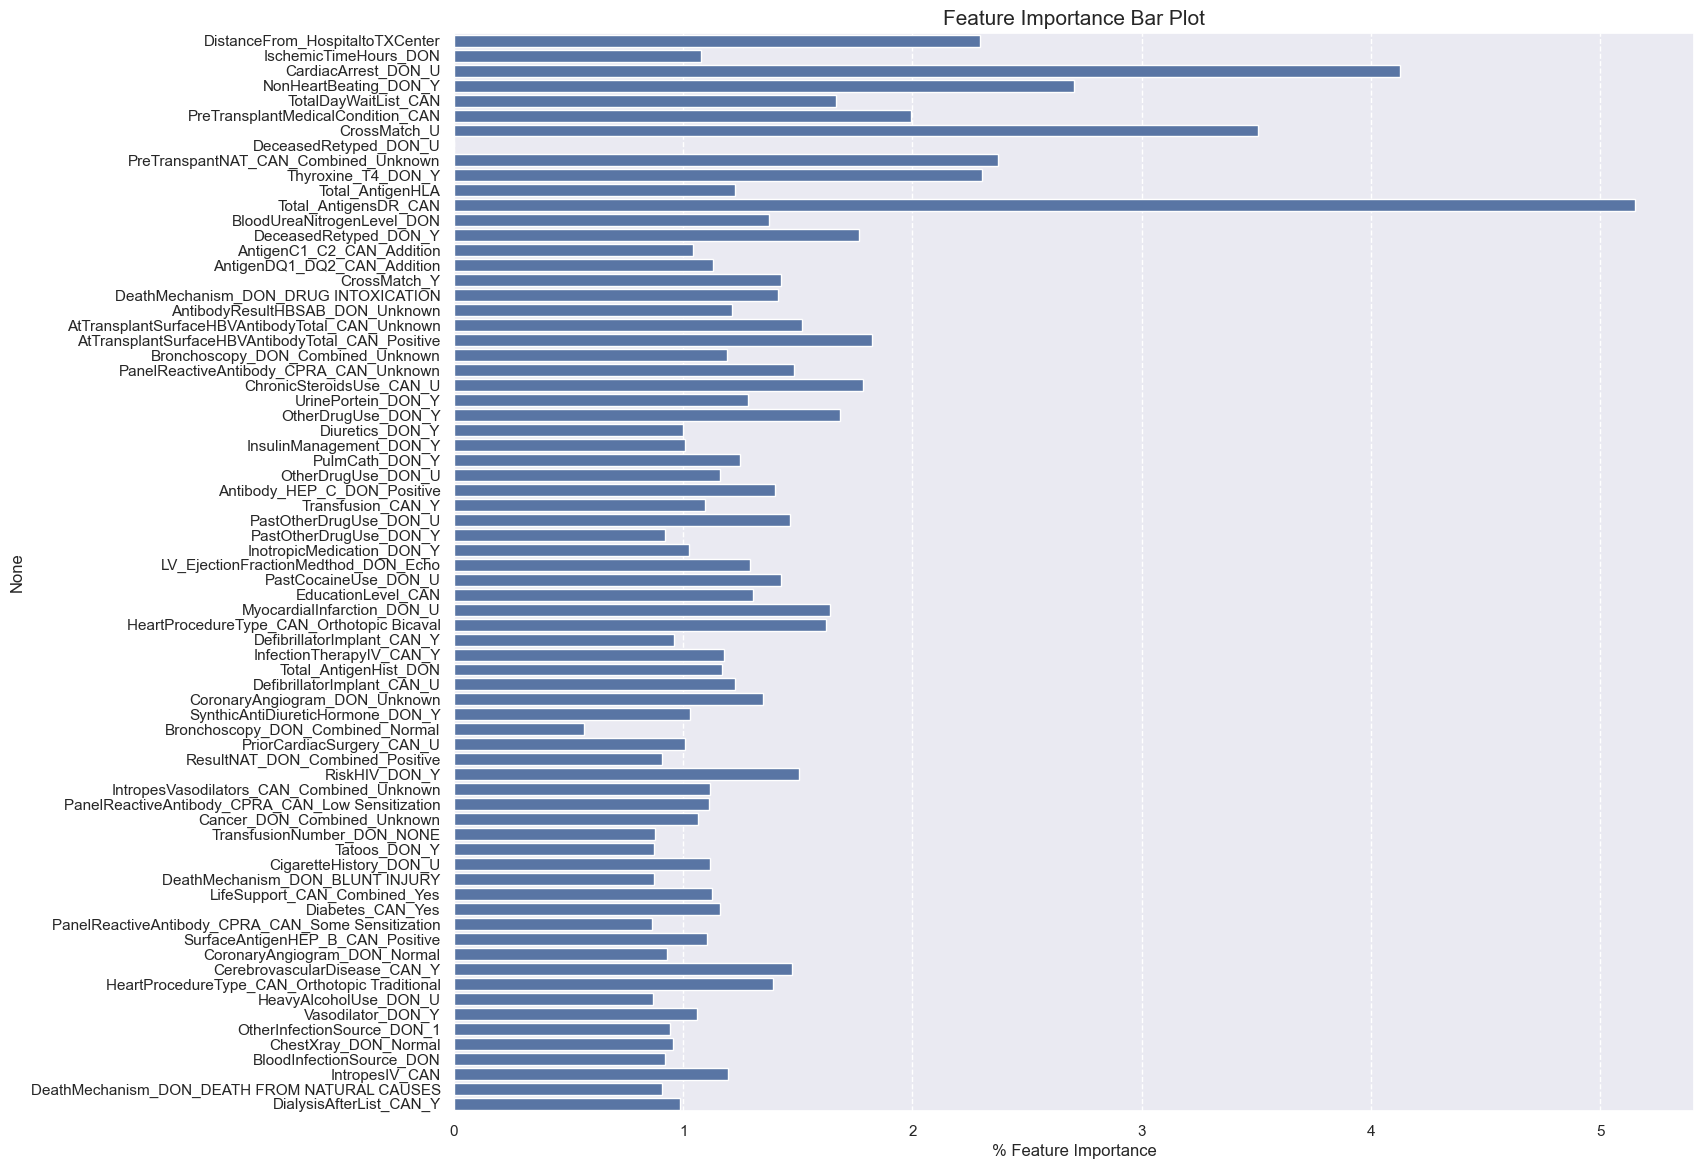

In [36]:
# plot
df_xgb = uf.plotFeatureImportance(model, X_train[selected],figsize=(16,14))

In [37]:
df_xgb.head(10)

,% Feature Importance
DistanceFrom_HospitaltoTXCenter,2.295233
IschemicTimeHours_DON,1.077192
CardiacArrest_DON_U,4.126472
NonHeartBeating_DON_Y,2.705354
TotalDayWaitList_CAN,1.665925
PreTransplantMedicalCondition_CAN,1.992372
CrossMatch_U,3.507721
DeceasedRetyped_DON_U,0.000000
PreTranspantNAT_CAN_Combined_Unknown,2.375037
Thyroxine_T4_DON_Y,2.304700


In [38]:
df_xgb.tail(10)

,% Feature Importance
CerebrovascularDisease_CAN_Y,1.473077
HeartProcedureType_CAN_Orthotopic Traditional,1.390925
HeavyAlcoholUse_DON_U,0.870222
Vasodilator_DON_Y,1.060417
OtherInfectionSource_DON_1,0.940984
ChestXray_DON_Normal,0.955836
BloodInfectionSource_DON,0.920704
IntropesIV_CAN,1.197607
DeathMechanism_DON_DEATH FROM NATURAL CAUSES,0.906270
DialysisAfterList_CAN_Y,0.987807


***** Classification Metrics for Training:
Classification Report:
               precision    recall  f1-score   support

       False       0.76      0.72      0.74      4742
        True       0.73      0.77      0.75      4765

    accuracy                           0.75      9507
   macro avg       0.75      0.75      0.75      9507
weighted avg       0.75      0.75      0.75      9507



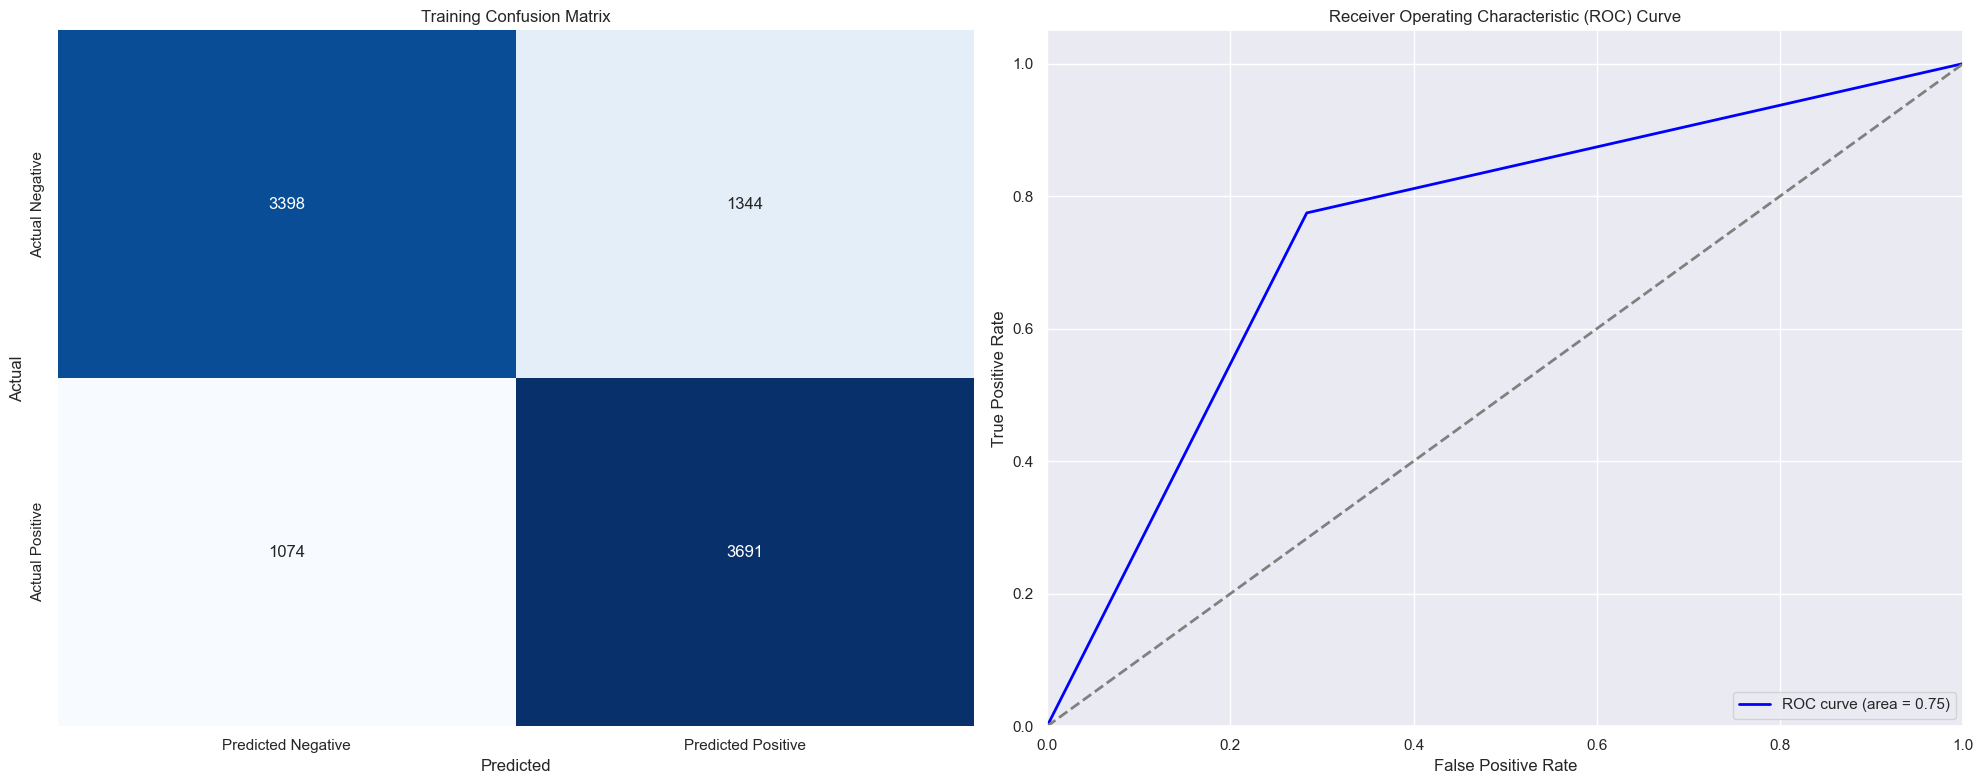

,Algorithm,Model,Description,DataType,Accuracy,RecallSensitivity,F1Score,AveragePrecision,Precision,Specificity,ROC_AUC_Score
0,RandomForestClassifier,rfc_5A_fit,RandomForestClassifier - Grid Search - Features where p_value <= 0.05,Training,0.700642,0.751312,0.715571,0.637848,0.683076,0.649726,0.700519
1,RandomForestClassifier,rfc_5A_fit,RandomForestClassifier - Grid Search - Features where p_value <= 0.05,Validation,0.667648,0.724601,0.686010,0.609937,0.651321,0.610455,0.667528
2,LogisticRegression,lrc_5A_fit,LogisticRegression - Grid Search - Features where p_value <= 0.05,Training,0.668876,0.694229,0.677591,0.612649,0.661732,0.643399,0.668814
3,LogisticRegression,lrc_5A_fit,LogisticRegression - Grid Search - Features where p_value <= 0.05,Validation,0.668490,0.685139,0.674380,0.612663,0.663954,0.651771,0.668455
4,XGBClassifier,xgb_5A_fit,XGBClassifier - Grid Search - Features where p_value <= 0.05,Training,0.745661,0.774607,0.753265,0.680809,0.733069,0.716575,0.745591


In [39]:
# initialize variables
Algorithm = 'XGBClassifier'
Desc = 'XGBClassifier - Grid Search - Features where p_value <= 0.05'
Model = 'xgb_5A_fit'
Type = 'Training'

# display
df_classfication = uf.ClassificationMatric(Algorithm, Model, Desc, model, X_train[selected], y_train, Type, metricDF=df_classfication)
df_classfication

***** Classification Metrics for Validation/Test:
Classification Report:
               precision    recall  f1-score   support

       False       0.70      0.67      0.69      1186
        True       0.69      0.71      0.70      1191

    accuracy                           0.69      2377
   macro avg       0.69      0.69      0.69      2377
weighted avg       0.69      0.69      0.69      2377



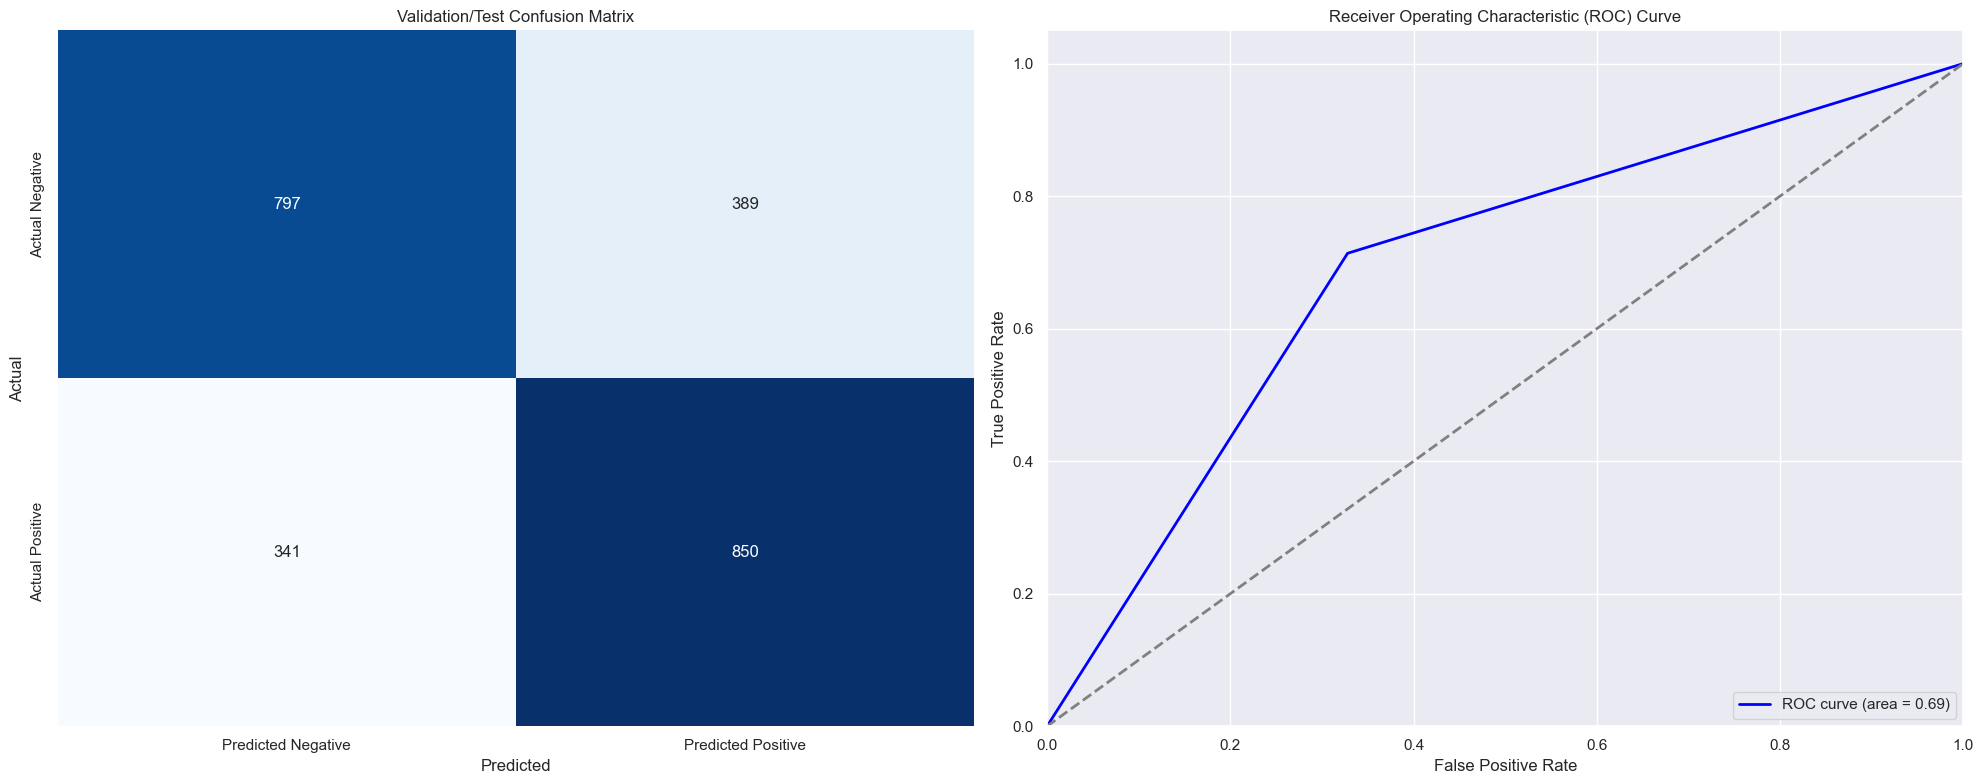

,Algorithm,Model,Description,DataType,Accuracy,RecallSensitivity,F1Score,AveragePrecision,Precision,Specificity,ROC_AUC_Score
0,RandomForestClassifier,rfc_5A_fit,RandomForestClassifier - Grid Search - Features where p_value <= 0.05,Training,0.700642,0.751312,0.715571,0.637848,0.683076,0.649726,0.700519
1,RandomForestClassifier,rfc_5A_fit,RandomForestClassifier - Grid Search - Features where p_value <= 0.05,Validation,0.667648,0.724601,0.686010,0.609937,0.651321,0.610455,0.667528
2,LogisticRegression,lrc_5A_fit,LogisticRegression - Grid Search - Features where p_value <= 0.05,Training,0.668876,0.694229,0.677591,0.612649,0.661732,0.643399,0.668814
3,LogisticRegression,lrc_5A_fit,LogisticRegression - Grid Search - Features where p_value <= 0.05,Validation,0.668490,0.685139,0.674380,0.612663,0.663954,0.651771,0.668455
4,XGBClassifier,xgb_5A_fit,XGBClassifier - Grid Search - Features where p_value <= 0.05,Training,0.745661,0.774607,0.753265,0.680809,0.733069,0.716575,0.745591
5,XGBClassifier,xgb_5A_fit,XGBClassifier - Grid Search - Features where p_value <= 0.05,Validation,0.692890,0.713686,0.699588,0.633073,0.686037,0.672007,0.692846


In [40]:
# initialize variable
Type = 'Validation'

# display
df_classfication = uf.ClassificationMatric(Algorithm, Model, Desc, model, X_val[selected], y_val, Type, metricDF=df_classfication)
df_classfication

##### Metrics
- `Accuracy` is a metric used to evaluate the performance of a classification model. It measures the proportion of correct predictions out of the total predictions made.
- `Recall`, also known as `Sensitivity` or `True Positive Rate` (TPR), is a metric used to evaluate the performance of a classification model, particularly in situations where correctly identifying positive cases
- The `F1 score` is the harmonic mean of `precision` and `recall`. It ranges from 0 to 1, where 1 indicates the best possible performance.
- `Average Precision` calculates the area under the precision-recall curve by averaging precision values at increasing recall levels.
- `Precision` is a metric used to evaluate the accuracy of positive predictions in a classification model, particularly useful in binary classification tasks. It measures how many of the instances predicted as positive are actually positive.
- `Specificity` (also known as the `True Negative Rate`) is a metric used in binary classification to measure the model’s ability to correctly identify negative instances. It tells us the proportion of actual negatives that were correctly classified as negative by the model.
- The `ROC AUC score` is a performance metric for classification models, particularly useful for evaluating models in binary classification tasks. It combines Receiver Operating Characteristic (ROC) curve analysis with the Area Under the Curve (AUC).
    -  The area under the ROC curve (AUC) provides a single value summary of the model's ability to discriminate between positive and negative classes. It ranges from 0 to 1, where:
    - AUC = 1: Perfect classifier (it perfectly separates positive and negative classes).
    - AUC = 0.5: Model has no discrimination ability (equivalent to random guessing).
    - AUC < 0.5: The model performs worse than random guessing (this suggests the model may need to be inverted or there’s an issue with the model).